In [1]:
%pip install numpy pandas seaborn matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [3]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# TLT ticker 

In [4]:
tlt_monthly_returns = pd.read_csv('../macro_data/tlt_monthly_returns.csv', index_col=0)

tlt_monthly_returns.index = pd.to_datetime(tlt_monthly_returns.index, format='%Y-%m-%d')


In [5]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > tlt_monthly_returns.index.min() else tlt_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < tlt_monthly_returns.index.max() else tlt_monthly_returns.index.max()

start_date, end_date

(Timestamp('2002-09-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [6]:
filtered_spy_monthly_returns = tlt_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = tlt_monthly_returns['TLT'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_27506/2051868635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = tlt_monthly_returns['TLT'] - filtered_goyal_welch_data['Rfree']


yyyymm
2002-09-01    0.053731
2002-10-01    0.041191
2002-11-01   -0.038143
2002-12-01   -0.010261
2003-01-01    0.044255
                ...   
2022-08-01    0.022410
2022-09-01   -0.047431
2022-10-01   -0.084651
2022-11-01   -0.062544
2022-12-01    0.068210
Name: excess_returns, Length: 244, dtype: float64

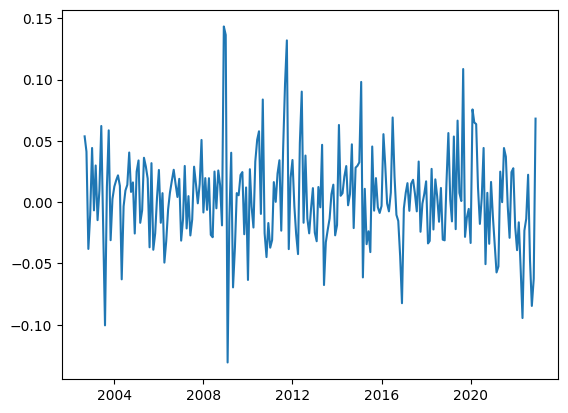

In [7]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

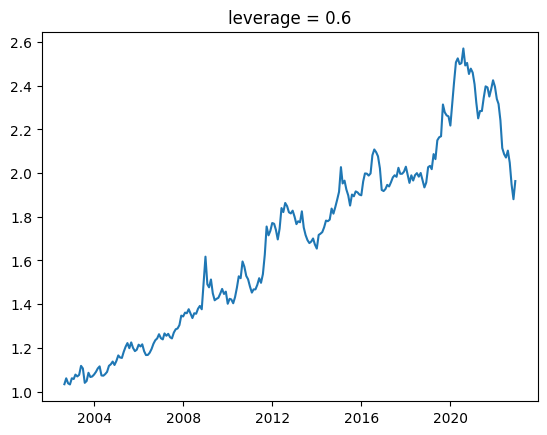

In [8]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [9]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [10]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
2002-09-01  0.000000  0.000000  0.000000  0.324555  0.0163  0.0615  0.0740   
2002-10-01  1.086436  1.005804  0.972813  0.293437  0.0158  0.0632  0.0773   
2002-11-01  1.057070  1.005764  0.972057  0.276975  0.0123  0.0631  0.0762   
2002-12-01  0.939667  1.005738  0.971250  0.295386  0.0119  0.0621  0.0745   
2003-01-01  0.972585  1.003111  1.032983  0.305942  0.0117  0.0617  0.0735   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [11]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((244, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [12]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
2002-09-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
2002-10-01,0.000000,0.000000,0.000000,0.324555,0.0163,0.0615,0.0740,0.0480,0.029299,0.0014,0.000000,0.0417,0.0330,0.007366
2002-11-01,1.086436,1.005804,0.972813,0.293437,0.0158,0.0632,0.0773,0.0508,0.025671,0.0014,0.001660,-0.0294,-0.0240,0.011590
2002-12-01,1.057070,1.005764,0.972057,0.276975,0.0123,0.0631,0.0762,0.0521,0.022908,0.0012,0.001657,-0.0122,0.0130,0.004449
2003-01-01,0.939667,1.005738,0.971250,0.295386,0.0119,0.0621,0.0745,0.0484,0.025736,0.0011,0.000000,0.0507,0.0361,0.002640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [13]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-11-01      0.012331      0.012217      0.011355      0.008612   
2012-12-01      0.019776      0.019731      0.019367      0.016769   
2013-01-01     -0.010701     -0.010790     -0.011423     -0.013208   
2013-02-01     -0.035145     -0.035107     -0.034790     -0.033220   
2013-03-01      0.017065      0.017043      0.016868      0.015775   
...                  ...           ...           ...           ...   
2022-08-01      0.016846      0.017010      0.018353      0.024309   
2022-09-01     -0.036432     -0.036565     -0.037482     -0.039256   
2022-10-01     -0.072580     -0.072762     -0.074003     -0.075784   
2022-11-01     -0.029228     -0.029100     -0.028005     -0.022380   
2022-12-01      0.023202      0.023254      0.023731      0.026651   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [14]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,-0.126554,-0.124808,-0.111287,-0.058300,-0.011964,0.000277,0.000634,0.000127,1.392150e-05,1.406146e-06
D12,0.137224,0.135708,0.123917,0.076724,0.028296,0.006878,0.001465,0.000222,2.374878e-05,2.391617e-06
E12,-0.047527,-0.047706,-0.048990,-0.051588,-0.034554,-0.007591,-0.000868,-0.000087,-8.726711e-06,-8.726101e-07
b/m,-0.012623,-0.012563,-0.012152,-0.010793,-0.001614,0.003534,0.000974,0.000138,1.450042e-05,1.458169e-06
tbl,-0.035789,-0.035484,-0.032921,-0.020341,-0.007560,-0.004659,-0.001658,-0.000228,-2.384865e-05,-2.395741e-06
AAA,0.052654,0.051743,0.045706,0.029887,0.016359,0.004648,0.000903,0.000138,1.483412e-05,1.494391e-06
BAA,-0.051094,-0.050498,-0.046261,-0.029006,-0.004166,0.001617,0.000497,0.000080,8.659283e-06,8.727353e-07
lty,-0.024628,-0.024140,-0.020996,-0.015334,-0.012646,-0.004456,-0.000398,-0.000003,5.061609e-07,5.979564e-08
ntis,0.002209,0.002185,0.002006,0.001654,0.001686,0.002082,0.000605,0.000087,9.193730e-06,9.247478e-07
Rfree,0.027798,0.027463,0.024693,0.011938,-0.000062,-0.003872,-0.001588,-0.000223,-2.338583e-05,-2.349958e-06


In [15]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-11-01     -0.000061     -0.000060     -0.000056     -0.000043   
2012-12-01      0.000227      0.000227      0.000223      0.000193   
2013-01-01      0.000266      0.000268      0.000284      0.000329   
2013-02-01      0.001120      0.001118      0.001108      0.001058   
2013-03-01      0.000211      0.000211      0.000209      0.000195   
...                  ...           ...           ...           ...   
2022-08-01      0.000378      0.000381      0.000411      0.000545   
2022-09-01      0.001728      0.001734      0.001778      0.001862   
2022-10-01      0.006144      0.006159      0.006264      0.006415   
2022-11-01      0.001828      0.001820      0.001752      0.001400   
2022-12-01      0.001583      0.001586      0.001619      0.001818   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [16]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [17]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[0.05 2.15 2.16 2.17 2.2  2.24 2.11 1.23 0.81 0.76 0.75]')

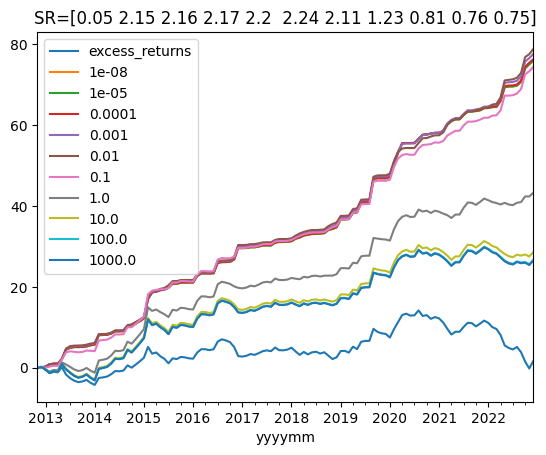

In [18]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [19]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             6.1
excess_returns    5.1
Name: z, dtype: float64


In [20]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [21]:
random_features.shape

(244, 100000)

In [22]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2012-11-01     -0.020766     -0.018702     -0.009642      0.001070   
2012-12-01     -0.009026     -0.007405      0.000490      0.010044   
2013-01-01     -0.057987     -0.056171     -0.045652     -0.031559   
2013-02-01     -0.078397     -0.076895     -0.066554     -0.052166   
2013-03-01     -0.005698     -0.004632      0.000859      0.007709   
...                  ...           ...           ...           ...   
2022-08-01      0.129730      0.119677      0.078946      0.029778   
2022-09-01     -0.056454     -0.059084     -0.064731     -0.065815   
2022-10-01     -0.082582     -0.087105     -0.099305     -0.109134   
2022-11-01      0.005961      0.000636     -0.018109     -0.034055   
2022-12-01      0.102541      0.095100      0.066752      0.035582   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.05\n0.0               2.15\n0.00001           2.16\n0.0001            2.17\n0.001             2.20\n0.01              2.24\n0.1               2.11\n1.0               1.23\n10.0              0.81\n100.0             0.76\n1000.0            0.75\n1e-08_complex     2.04\n1e-05_complex     2.07\n0.0001_complex    2.19\n0.001_complex     2.16\n0.01_complex      2.18\n0.1_complex       2.23\n1.0_complex       2.24\n10.0_complex      2.18\n100.0_complex     2.11\n1000.0_complex    1.77\nmean              2.09\ndtype: float64')

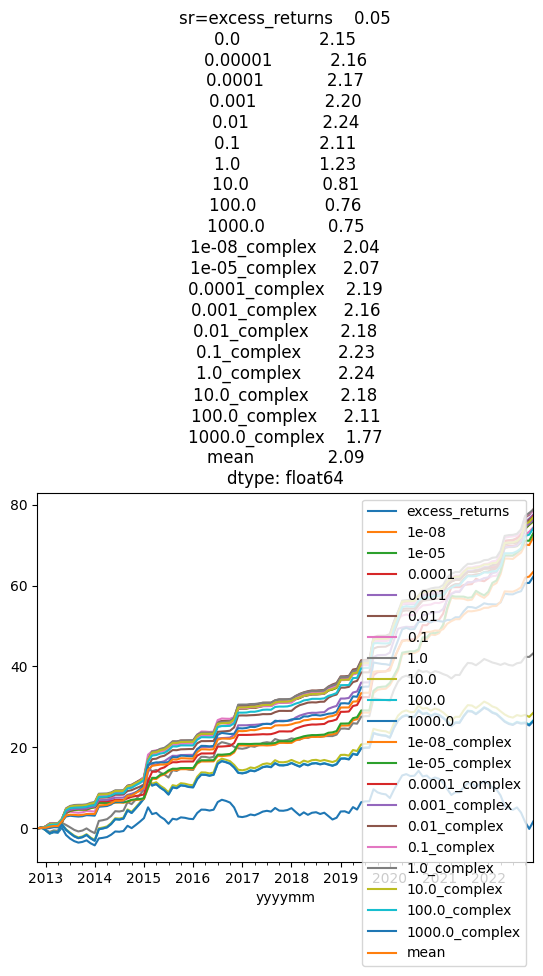

In [23]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [24]:
cleaned_data.corr()[0.01]

Index             0.012228
D12               0.084194
E12              -0.157271
b/m              -0.084146
tbl               0.149229
AAA               0.035383
BAA               0.057763
lty              -0.005219
ntis              0.002255
Rfree             0.154773
infl              0.092770
ltr              -0.151036
corpr            -0.166244
svar              0.195797
CRSP_SPvw         0.009907
CRSP_SPvwx        0.009527
excess_returns    0.173131
0.0               0.978300
0.00001           0.978716
0.0001            0.981693
0.001             0.991788
0.01              1.000000
0.1               0.972587
1.0               0.648924
10.0              0.478763
100.0             0.456377
1000.0            0.454071
1e-08_complex     0.766492
1e-05_complex     0.782350
0.0001_complex    0.882076
0.001_complex     0.979110
0.01_complex      0.977269
0.1_complex       0.973700
1.0_complex       0.977797
10.0_complex      0.970569
100.0_complex     0.962061
1000.0_complex    0.872947
N

In [25]:
tstats = regression_with_tstats(predicted_variable=tmp['0.01_complex'], explanatory_variables=tmp[['excess_returns', 0.01]])
print(tstats)

const             -0.1
excess_returns    -0.2
0.01              53.4
Name: z, dtype: float64
